# MVA 2017/2018 : Object Recognition and Computer Vision 
## Final Project: A Review  of Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks, by Jun-Yan Zhu, Taesung Park, et al.
### Bastien PONCHON

This Notebook contains a few miscellanous code I producted for experimentation purposes on the training and testing of the CycleGAN architecture proposed by the authors of the paper. The latter was done by running PyTorch scripts with various parameters and datasets.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline  
import scipy.misc
import os

### Generating simple binary shapes

One of my first experiments was to train the network to translate binary cricles into binary squares and the other way round. The following cells aims at generating the data for training and testing of the architecture.

In [2]:
def genCircles(setSize, inputSize):
    # Generates setSize binary images of size inputSize*inputSize of circles of various size and location.
    img = np.ones((setSize, 1, inputSize, inputSize))
    R2= np.random.randint(1, 22*inputSize, setSize)
    xc = np.random.randint(int(0.08*inputSize), int(inputSize - 0.08*inputSize), setSize)
    yc = np.random.randint(int(0.08*inputSize), int(inputSize - 0.08*inputSize), setSize)
    for i in range(setSize):
        xci = xc[i]
        yci = yc[i]
        R2i = R2[i]
        for x in range(inputSize):
            for y in range(inputSize):
                tmp = (x-xci)**2+ (y-yci)**2
                if tmp<R2i:
                    img[i,0,x,y] = 0 
    return img

In [3]:
def genSquares(setSize, inputSize):
    # Generates setSize binary images of size inputSize*inputSize of shapes of various size and location.
    img = np.ones((setSize, 1, inputSize, inputSize))
    R= np.random.randint(1, int(0.75*inputSize), setSize)
    xc = np.random.randint(int(0.08*inputSize), int(inputSize - 0.08*inputSize), setSize)
    yc = np.random.randint(int(0.08*inputSize), int(inputSize - 0.08*inputSize), setSize)
    for i in range(setSize):
        tmp = int(R[i]/2)
        xl = max(xc[i] - tmp, 0)
        xh = max(xc[i] + tmp,0)
        yl = max(yc[i] - tmp, 0)
        yh = max(yc[i] + tmp, 0)
        img[i,0,xl:xh,yl:yh] = 0 
    return img

In [6]:
imgCircles = genCircles(10, 64)
imgSquares = genSquares(10, 64)

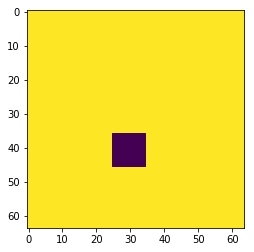

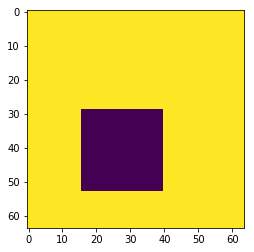

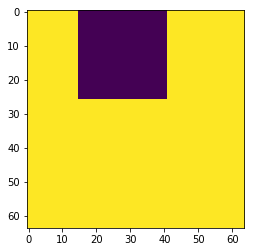

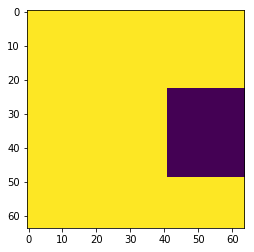

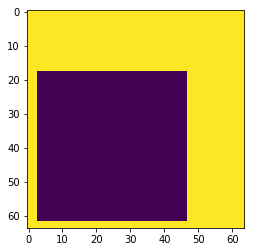

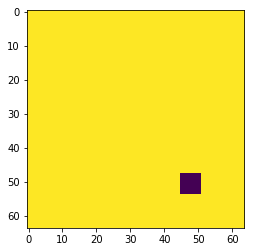

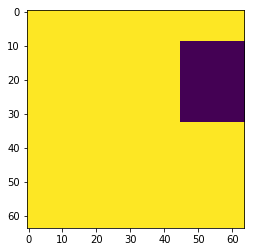

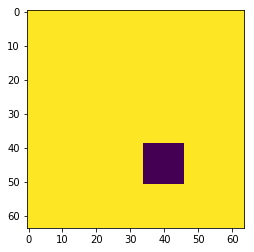

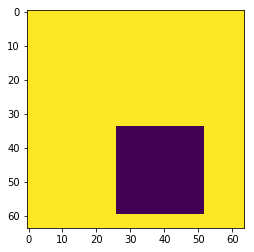

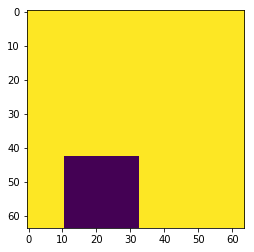

In [7]:
for im in imgSquares:
    plt.imshow(im[0])
    plt.show()

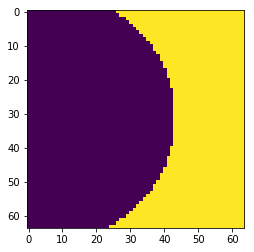

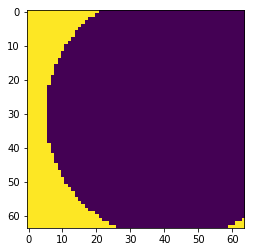

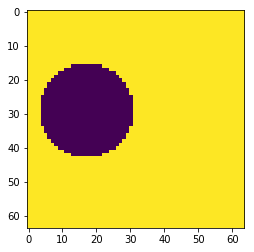

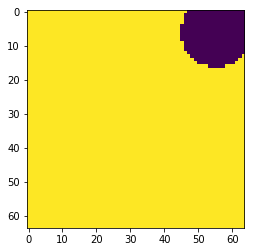

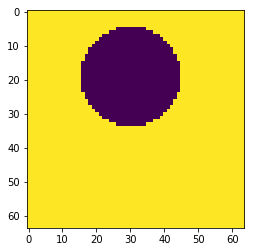

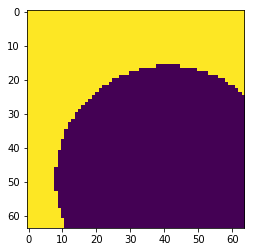

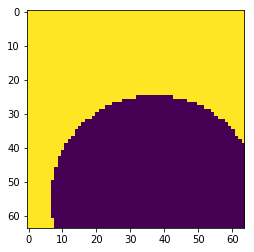

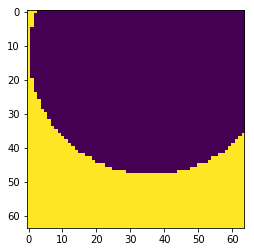

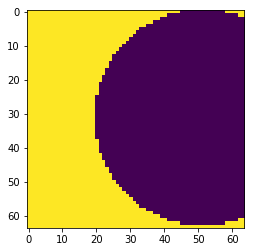

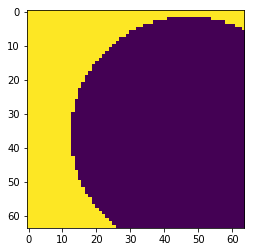

In [8]:
for im in imgCircles:
    plt.imshow(im[0])
    plt.show()

In [104]:
def genImages(trainAsize, trainBsize, testAsize, testBsize, inputSize):
    # generates and saves in the four sub-directories four sets of inputSize*InputSize images: 
    # One training set of trainAsize binary images of squares
    # One training set of trainBsize binary images of circles
    # One training set of testAsize binary images of squares
    # One training set of testBsize binary images of circles
    # Warning: requires the current directory not to contain any directories named "trainA", "trainB", "testA" or "testB"
    i = 0
    j = 0
    dirn = './square2circle/'
    os.mkdir(dirn)
    os.mkdir(dirn + 'trainA/')
    os.mkdir(dirn + 'trainB/')
    os.mkdir(dirn + 'testA/')
    os.mkdir(dirn + 'testB/')
    trainA = genSquares(trainAsize, inputSize)
    trainB = genCircles(trainBsize, inputSize)
    testA = genSquares(testAsize, inputSize)
    testB = genCircles(testBsize, inputSize)
    
    for im in trainA:
        subdirn = dirn + 'trainA/'
        name = subdirn + "square_" + str(i) + '.jpg'
        scipy.misc.imsave(name, im[0,:,:])
        i += 1
        
    for im in trainB:
        subdirn = dirn + 'trainB/'
        name = subdirn + "circles_" + str(j) + '.jpg'
        scipy.misc.imsave(name, im[0,:,:])
        j += 1
        
    for im in testA:
        subdirn = dirn + 'testA/'
        name = subdirn + "square_" + str(i) + '.jpg'
        scipy.misc.imsave(name, im[0,:,:])
        i += 1
        
    for im in testB:
        subdirn = dirn + 'testB/'
        name = subdirn + "circles_" + str(j) + '.jpg'
        scipy.misc.imsave(name, im[0,:,:])
        j += 1



In [106]:
genImages(100, 100, 0, 0, 64)

### Turning color images into gray level images

The following cells concern another experiment, that was training the CycleGAN architecture to color gray level images and the other way round. Therefore, here are a few pieces of code to generate the appropriate datasets.

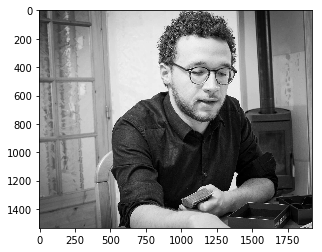

(1533, 1920)

In [11]:
def rgb2gray(rgb):
    # turns a color image rgb to gray level image
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('remi.jpg')     
gray = rgb2gray(img)    
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()
#scipy.misc.imsave('gary.jpg', gray)

np.shape(gray)



In [3]:
def rgb2graySet(path):
    # Save into a sub-directory "./path/gray/" a gray level version of all the the images in the directory "./path/"
    dirn = path + 'gray/'
    rgbImages = os.listdir(path)
    os.mkdir(dirn)
    i = 0
    for im in rgbImages:
        img = mpimg.imread(path + im)     
        gray = rgb2gray(img)
        scipy.misc.imsave(dirn + 'gray_' + str(i) + '.jpg', gray)
        i = i + 1
    

In [5]:
rgb2graySet('../../../Desktop/toGray/')

### Plotting loss as a function of the number of iteration

The training scripts of the CycleGAN architecture produce a "loss_log.txt" file  keeping record of the 6 loss functions of the training procedure (actually there is one other loss funtion, the identity mapping loss, which aimed at preserving the color of the input paintings in the translation from paitings to photographs. Otherwise the architecture tends to change the daylight pictured in the painting) at various iterations and epochs. The following plots represent the evolution of the loss functions during the training procedures of the various experiments I implemented.

D_A_loss and D_B_loss are the discriminator losses of the two GANs composing the CycleGAN architecture (see report) and  G_A_loss and G_B_loss are the generator losses of the respective generators.

Cyc_A_loss and Cyc_B_loss are respectively the forward and backward cycle consistency losses. (see report)

#### Square To Circle

In [98]:
D_A_loss = np.loadtxt('./square2circle_results/loss_log.txt', usecols=7)
G_A_loss = np.loadtxt('./square2circle_results/loss_log.txt', usecols=9)
Cyc_A_loss = np.loadtxt('./square2circle_results/loss_log.txt', usecols=11)
D_B_loss = np.loadtxt('./square2circle_results/loss_log.txt', usecols=13)
G_B_loss = np.loadtxt('./square2circle_results/loss_log.txt', usecols=15)
Cyc_B_loss = np.loadtxt('./square2circle_results/loss_log.txt', usecols=17)

In [24]:
np.shape(D_A_loss)[0]

510

Text(0,0.5,'D_A_loss')

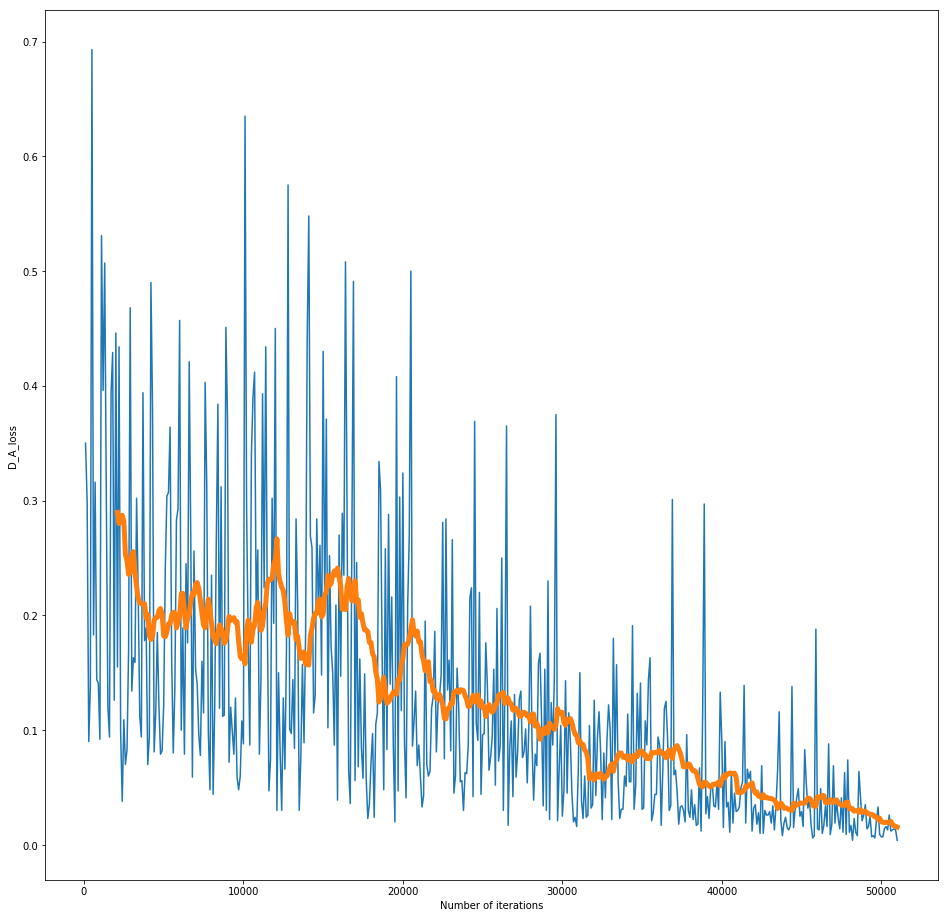

In [74]:
plt.figure(figsize=(16,16))
t = [100*(i+1) for i in range(np.shape(D_A_loss)[0])]
moyenneGlissante_D_A = [np.mean(D_A_loss[i-20:i]) 
                    for i in range(20, np.shape(D_A_loss)[0])]

plt.plot(t, D_A_loss)
plt.plot(t[20:], moyenneGlissante_D_A, linewidth=5)
plt.xlabel('Number of iterations')
plt.ylabel('D_A_loss')



Text(0,0.5,'D_B_loss')

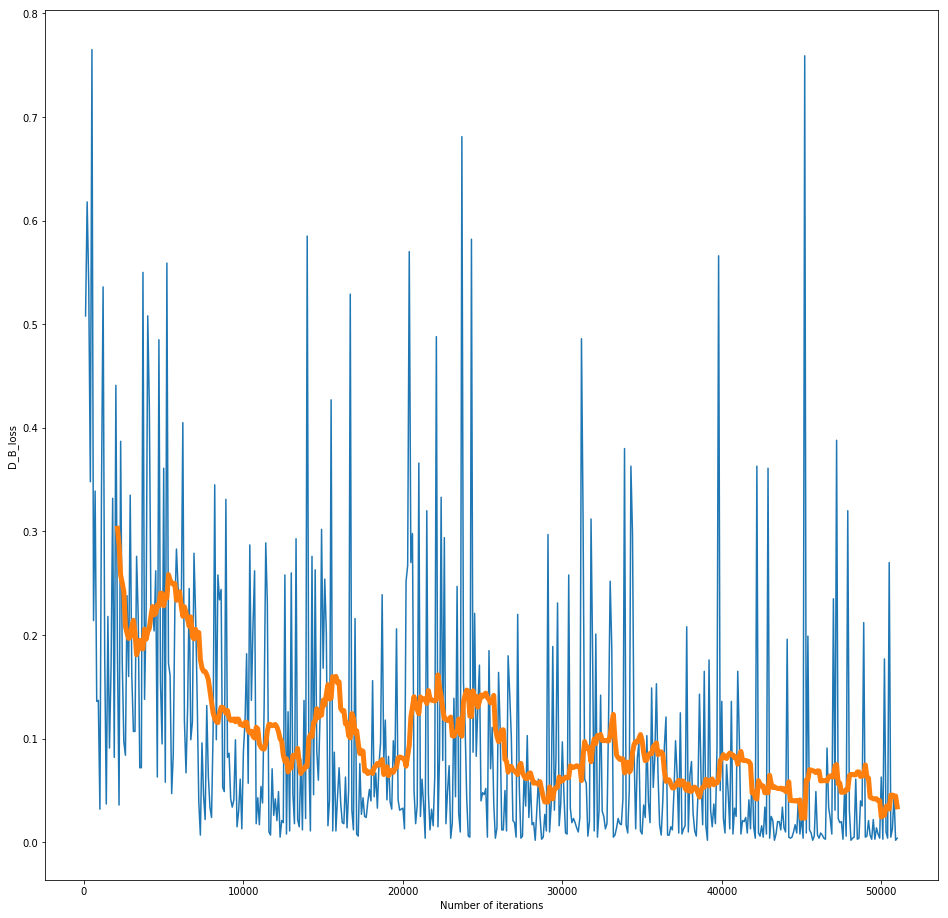

In [75]:
plt.figure(figsize=(16,16))
t = [100*(i+1) for i in range(np.shape(D_B_loss)[0])]
moyenneGlissante_D_B = [np.mean(D_B_loss[i-20:i]) 
                    for i in range(20, np.shape(D_B_loss)[0])]
plt.plot(t, D_B_loss)
plt.plot(t[20:], moyenneGlissante_D_B, linewidth=5)
plt.xlabel('Number of iterations')
plt.ylabel('D_B_loss')

Text(0,0.5,'G_A_loss')

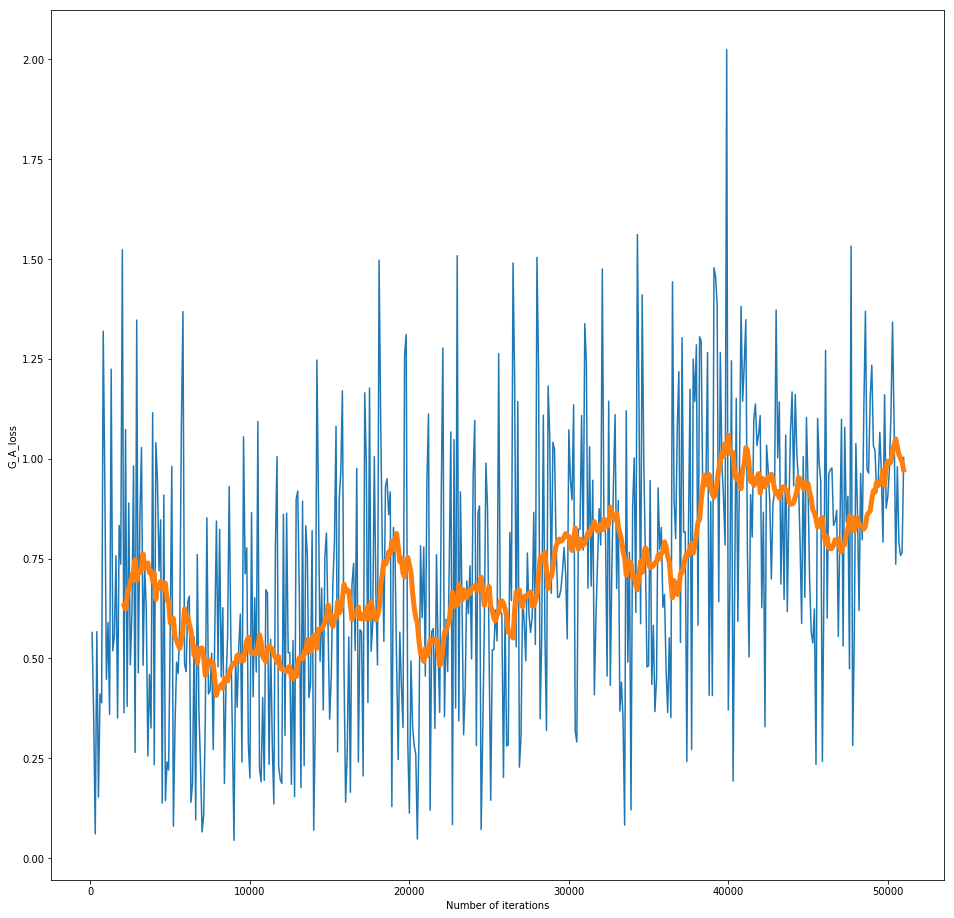

In [70]:
plt.figure(figsize=(16,16))
t = [100*(i+1) for i in range(np.shape(G_A_loss)[0])]
moyenneGlissante_G_A = [np.mean(G_A_loss[i-20:i]) 
                    for i in range(20, np.shape(G_A_loss)[0])]
plt.plot(t, G_A_loss)
plt.plot(t[20:], moyenneGlissante_G_A, linewidth=5)
plt.xlabel('Number of iterations')
plt.ylabel('G_A_loss')

Text(0,0.5,'G_B_loss')

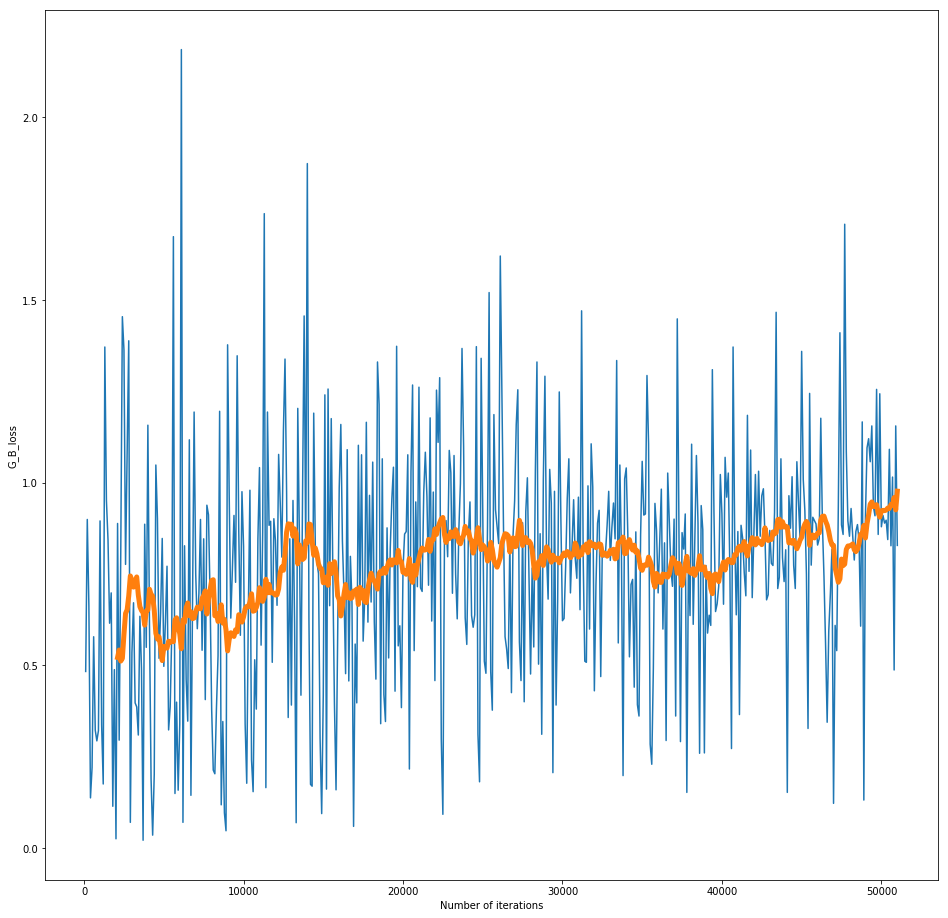

In [71]:
plt.figure(figsize=(16,16))
t = [100*(i+1) for i in range(np.shape(G_B_loss)[0])]
moyenneGlissante_G_B = [np.mean(G_B_loss[i-20:i]) 
                    for i in range(20, np.shape(G_B_loss)[0])]
plt.plot(t, G_B_loss)
plt.plot(t[20:], moyenneGlissante_G_B, linewidth=5)
plt.xlabel('Number of iterations')
plt.ylabel('G_B_loss')

Text(0,0.5,'Cyc_A_loss')

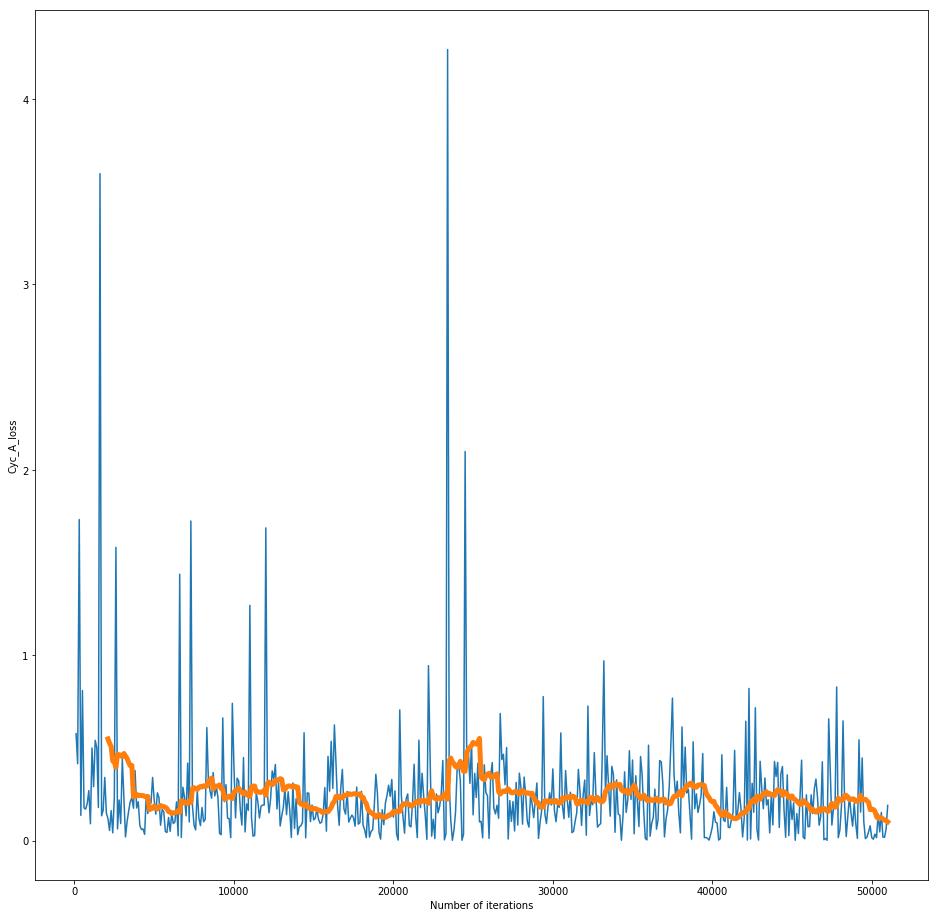

In [72]:
plt.figure(figsize=(16,16))
t = [100*(i+1) for i in range(np.shape(Cyc_A_loss)[0])]
moyenneGlissante_Cyc_A = [np.mean(Cyc_A_loss[i-20:i]) 
                    for i in range(20, np.shape(Cyc_A_loss)[0])]
plt.plot(t, Cyc_A_loss)
plt.plot(t[20:], moyenneGlissante_Cyc_A, linewidth=5)
plt.xlabel('Number of iterations')
plt.ylabel('Cyc_A_loss')

Text(0,0.5,'Cyc_B_loss')

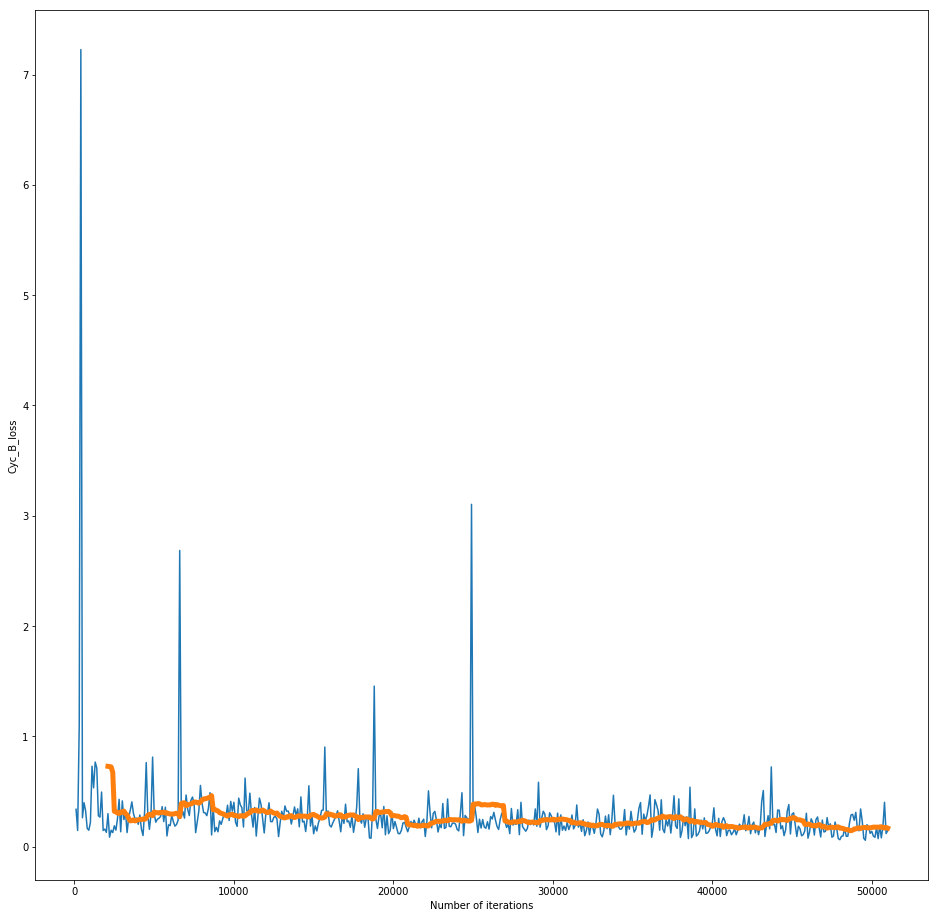

In [73]:
plt.figure(figsize=(16,16))
t = [100*(i+1) for i in range(np.shape(Cyc_B_loss)[0])]
moyenneGlissante_Cyc_B = [np.mean(Cyc_B_loss[i-20:i]) 
                    for i in range(20, np.shape(Cyc_B_loss)[0])]
plt.plot(t, Cyc_B_loss)
plt.plot(t[20:], moyenneGlissante_Cyc_B, linewidth=5)
plt.xlabel('Number of iterations')
plt.ylabel('Cyc_B_loss')

As we can see all the loss functions have suffer from quite severe oscillations (which is common in the GAN framework), in the following cells, we will only plot sliding window averages of the loss functions.

Text(0.5,1,'Sliding window average (50 values) of various losses in training or square2circle model')

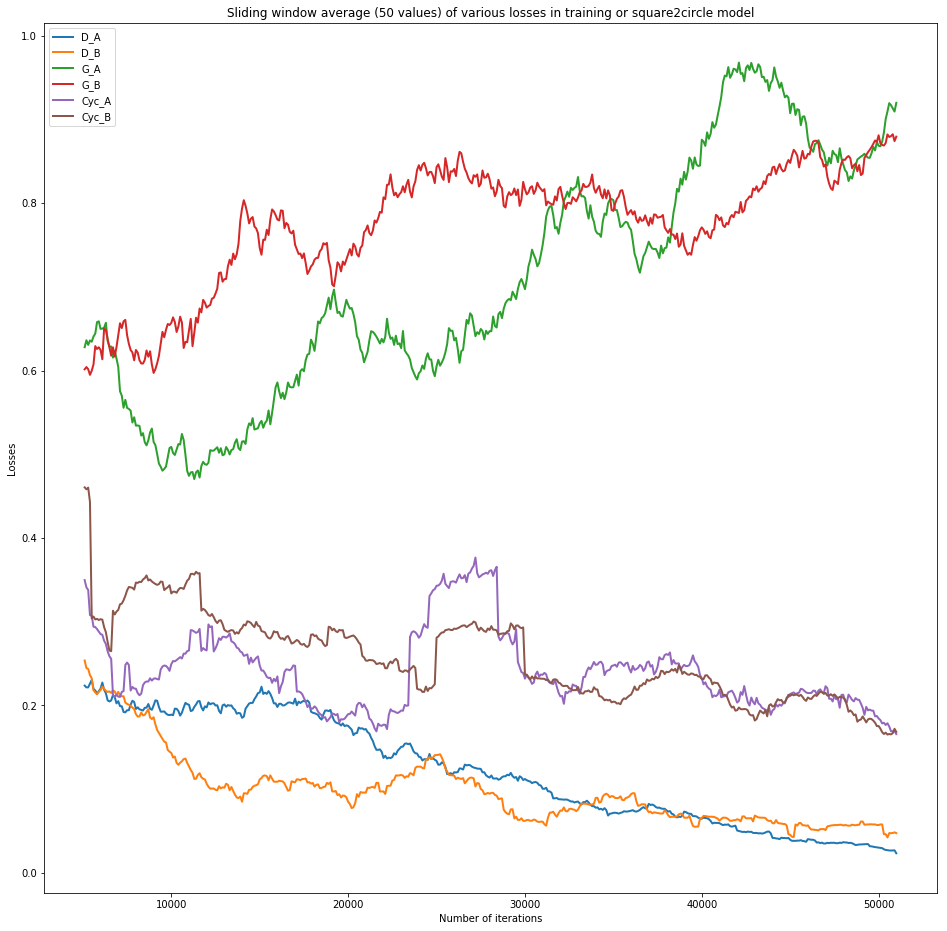

In [99]:
plt.figure(figsize=(16,16))
t = [100*(i+1) for i in range(np.shape(Cyc_A_loss)[0])]

moyenneGlissante_D_A = [np.mean(D_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_D_B = [np.mean(D_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_G_A = [np.mean(G_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_G_B = [np.mean(G_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_Cyc_A = [np.mean(Cyc_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_Cyc_B = [np.mean(Cyc_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]


plt.plot(t[50:], moyenneGlissante_D_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_D_B, linewidth=2)
plt.plot(t[50:], moyenneGlissante_G_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_G_B, linewidth=2)
plt.plot(t[50:], moyenneGlissante_Cyc_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_Cyc_B, linewidth=2)

plt.legend(['D_A', 'D_B', 'G_A', 'G_B', 'Cyc_A', 'Cyc_B'])
plt.xlabel('Number of iterations')
plt.ylabel('Losses')
plt.title('Sliding window average (50 values) of various losses in training or square2circle model')

### Color To gray 

In [94]:
D_A_loss = np.loadtxt('./color2gray_results/loss_log.txt', usecols=7)
G_A_loss = np.loadtxt('./color2gray_results/loss_log.txt', usecols=9)
Cyc_A_loss = np.loadtxt('./color2gray_results/loss_log.txt', usecols=11)
D_B_loss = np.loadtxt('./color2gray_results/loss_log.txt', usecols=13)
G_B_loss = np.loadtxt('./color2gray_results/loss_log.txt', usecols=15)
Cyc_B_loss = np.loadtxt('./color2gray_results/loss_log.txt', usecols=17)

Text(0.5,1,'Sliding window average (50 values) of various losses in training or color2gray cycleGAN ')

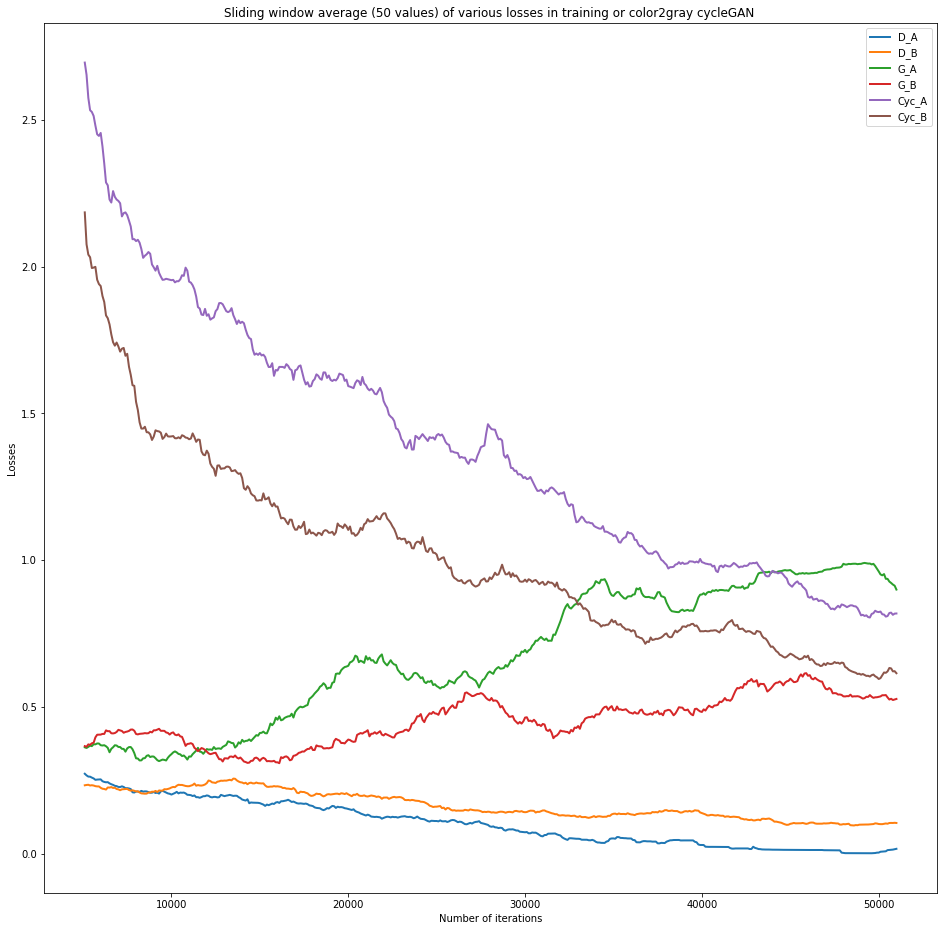

In [96]:
plt.figure(figsize=(16,16))
t = [100*(i+1) for i in range(np.shape(Cyc_A_loss)[0])]

moyenneGlissante_D_A = [np.mean(D_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_D_B = [np.mean(D_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_G_A = [np.mean(G_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_G_B = [np.mean(G_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_Cyc_A = [np.mean(Cyc_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_Cyc_B = [np.mean(Cyc_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]


plt.plot(t[50:], moyenneGlissante_D_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_D_B, linewidth=2)
plt.plot(t[50:], moyenneGlissante_G_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_G_B, linewidth=2)
plt.plot(t[50:], moyenneGlissante_Cyc_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_Cyc_B, linewidth=2)

plt.legend(['D_A', 'D_B', 'G_A', 'G_B', 'Cyc_A', 'Cyc_B'])
plt.xlabel('Number of iterations')
plt.ylabel('Losses')
plt.title('Sliding window average (50 values) of various losses in training or color2gray cycleGAN ')

### Vangogh2Photo

In [112]:
D_A_loss = np.loadtxt('./vangogh2photo_results/loss_log.txt', usecols=7)
G_A_loss = np.loadtxt('./vangogh2photo_results/loss_log.txt', usecols=9)
Cyc_A_loss = np.loadtxt('./vangogh2photo_results/loss_log.txt', usecols=11)
D_B_loss = np.loadtxt('./vangogh2photo_results/loss_log.txt', usecols=13)
G_B_loss = np.loadtxt('./vangogh2photo_results/loss_log.txt', usecols=15)
Cyc_B_loss = np.loadtxt('./vangogh2photo_results/loss_log.txt', usecols=17)

Text(0.5,1,'Sliding window average (50 values) of various losses in training of vangogh2Photo cycleGAN ')

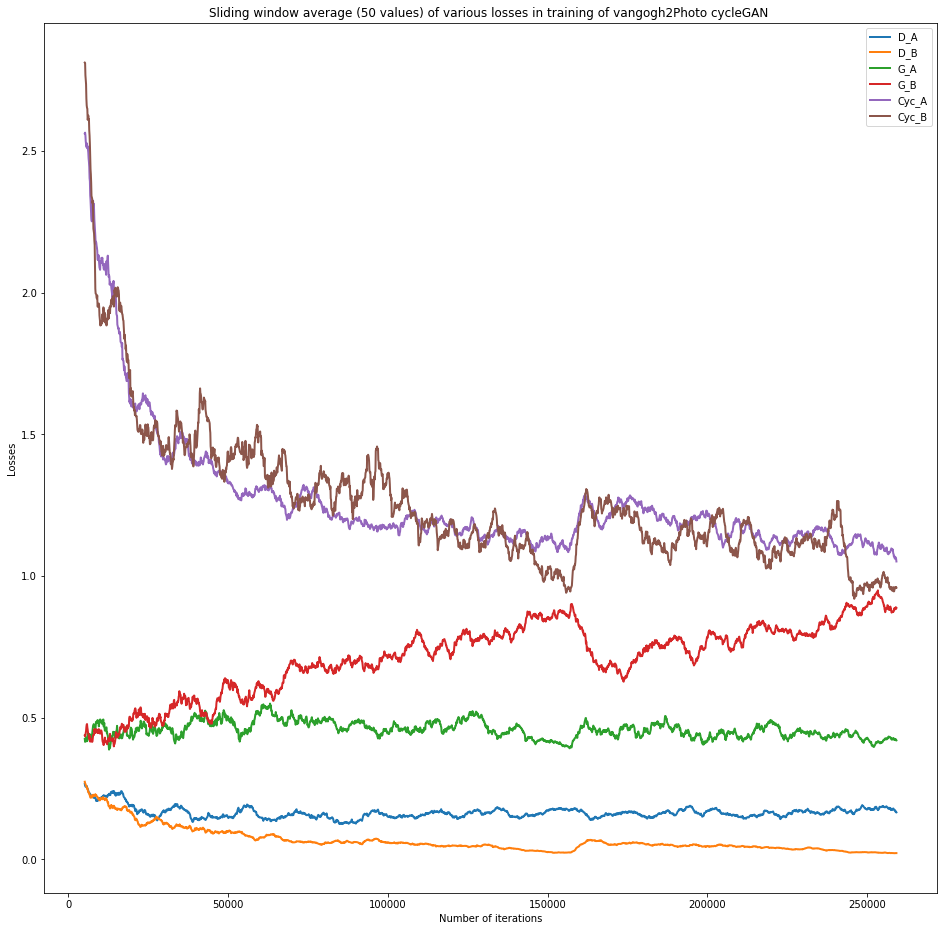

In [114]:
plt.figure(figsize=(16,16))
t = [100*(i+1) for i in range(np.shape(Cyc_A_loss)[0])]

moyenneGlissante_D_A = [np.mean(D_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_D_B = [np.mean(D_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_G_A = [np.mean(G_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_G_B = [np.mean(G_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_Cyc_A = [np.mean(Cyc_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_Cyc_B = [np.mean(Cyc_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]


plt.plot(t[50:], moyenneGlissante_D_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_D_B, linewidth=2)
plt.plot(t[50:], moyenneGlissante_G_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_G_B, linewidth=2)
plt.plot(t[50:], moyenneGlissante_Cyc_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_Cyc_B, linewidth=2)

plt.legend(['D_A', 'D_B', 'G_A', 'G_B', 'Cyc_A', 'Cyc_B'])
plt.xlabel('Number of iterations')
plt.ylabel('Losses')
plt.title('Sliding window average (50 values) of various losses in training of vangogh2Photo cycleGAN ')

### Color To Gray with Batch Normalization instead of instance Normalization

In [7]:
D_A_loss = np.loadtxt('./color2gray_results/color2gray_batchNorm/loss_log.txt', usecols=7)
G_A_loss = np.loadtxt('./color2gray_results/color2gray_batchNorm/loss_log.txt', usecols=9)
Cyc_A_loss = np.loadtxt('./color2gray_results/color2gray_batchNorm/loss_log.txt', usecols=11)
D_B_loss = np.loadtxt('./color2gray_results/color2gray_batchNorm/loss_log.txt', usecols=13)
G_B_loss = np.loadtxt('./color2gray_results/color2gray_batchNorm/loss_log.txt', usecols=15)
Cyc_B_loss = np.loadtxt('./color2gray_results/color2gray_batchNorm/loss_log.txt', usecols=17)

Text(0.5,1,'Sliding window average (50 values) of various losses in training or color2gray cycleGAN ')

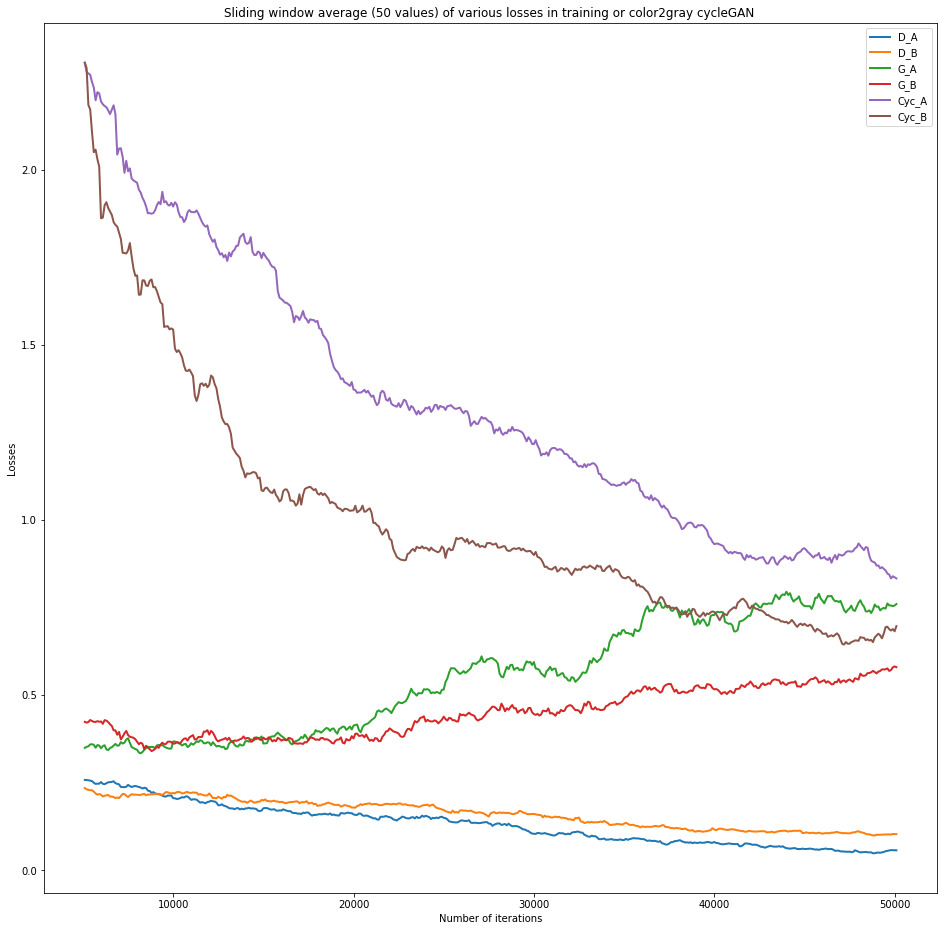

In [8]:
plt.figure(figsize=(16,16))
t = [100*(i+1) for i in range(np.shape(Cyc_A_loss)[0])]

totalLoss = D_A_loss + D_B_loss + 10*Cyc_A_loss + G_A_loss + G_B_loss + 10*Cyc_B_loss

moyenneGlissante_D_A = [np.mean(D_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_D_B = [np.mean(D_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_G_A = [np.mean(G_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_G_B = [np.mean(G_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_Cyc_A = [np.mean(Cyc_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_Cyc_B = [np.mean(Cyc_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]

moyenneGlissante_total = [np.mean(totalLoss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]

plt.plot(t[50:], moyenneGlissante_D_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_D_B, linewidth=2)
plt.plot(t[50:], moyenneGlissante_G_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_G_B, linewidth=2)
plt.plot(t[50:], moyenneGlissante_Cyc_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_Cyc_B, linewidth=2)
#plt.plot(t[50:], moyenneGlissante_total, linewidth=2)


plt.legend(['D_A', 'D_B', 'G_A', 'G_B', 'Cyc_A', 'Cyc_B', 'total'])
plt.xlabel('Number of iterations')
plt.ylabel('Losses')
plt.title('Sliding window average (50 values) of various losses in training or color2gray cycleGAN ')

### Color To Gray with No Decay

11 heures et 10 minutes

In [9]:
D_A_loss = np.loadtxt('./color2gray_results/color2gray_noDecay/loss_log.txt', usecols=7)
G_A_loss = np.loadtxt('./color2gray_results/color2gray_noDecay/loss_log.txt', usecols=9)
Cyc_A_loss = np.loadtxt('./color2gray_results/color2gray_noDecay/loss_log.txt', usecols=11)
D_B_loss = np.loadtxt('./color2gray_results/color2gray_noDecay/loss_log.txt', usecols=13)
G_B_loss = np.loadtxt('./color2gray_results/color2gray_noDecay/loss_log.txt', usecols=15)
Cyc_B_loss = np.loadtxt('./color2gray_results/color2gray_noDecay/loss_log.txt', usecols=17)

Text(0.5,1,'Sliding window average (50 values) of various losses in training or color2gray cycleGAN ')

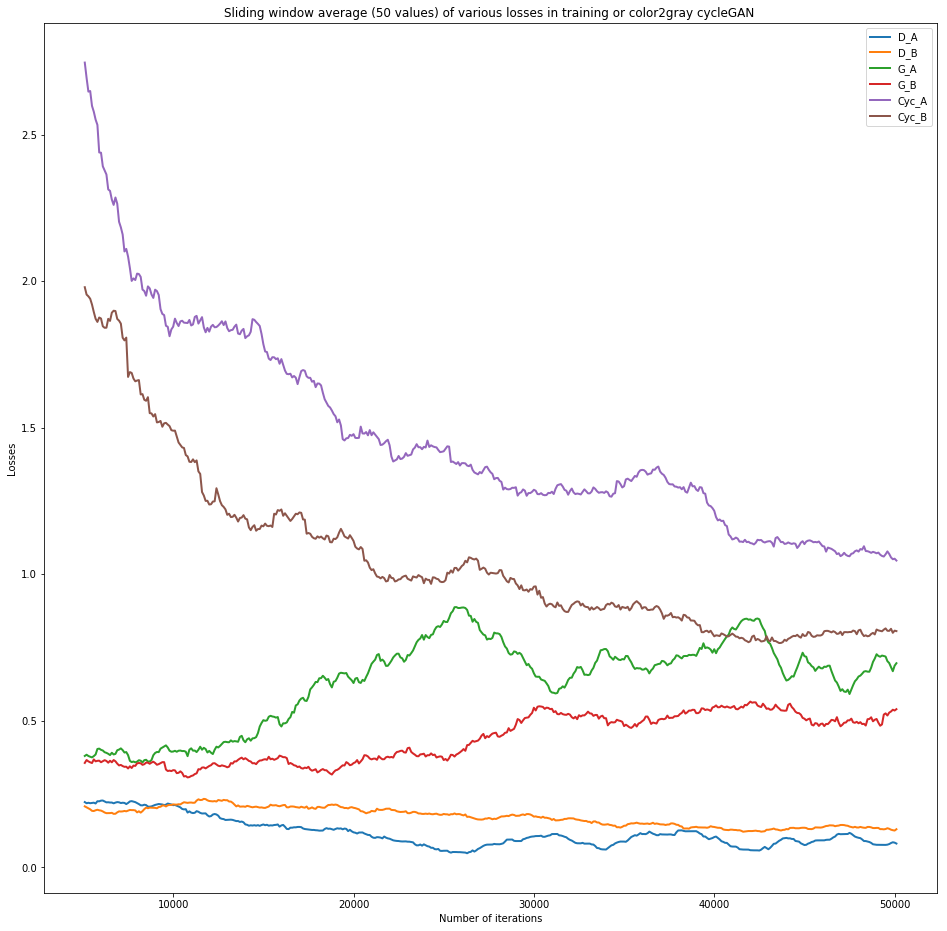

In [10]:
plt.figure(figsize=(16,16))
t = [100*(i+1) for i in range(np.shape(Cyc_A_loss)[0])]

moyenneGlissante_D_A = [np.mean(D_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_D_B = [np.mean(D_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_G_A = [np.mean(G_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_G_B = [np.mean(G_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_Cyc_A = [np.mean(Cyc_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_Cyc_B = [np.mean(Cyc_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]

totalLoss = D_A_loss + D_B_loss + 10*Cyc_A_loss + G_A_loss + G_B_loss + 10*Cyc_B_loss

moyenneGlissante_total = [np.mean(totalLoss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]

#plt.plot(t[50:], moyenneGlissante_total, linewidth=2)

plt.plot(t[50:], moyenneGlissante_D_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_D_B, linewidth=2)
plt.plot(t[50:], moyenneGlissante_G_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_G_B, linewidth=2)
plt.plot(t[50:], moyenneGlissante_Cyc_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_Cyc_B, linewidth=2)

plt.legend(['D_A', 'D_B', 'G_A', 'G_B', 'Cyc_A', 'Cyc_B'])
plt.xlabel('Number of iterations')
plt.ylabel('Losses')
plt.title('Sliding window average (50 values) of various losses in training or color2gray cycleGAN ')

### Color To Gray with Only decay

In [17]:
D_A_loss = np.loadtxt('./color2gray_results/color2grayOnlyDecay/loss_log.txt', usecols=7)
G_A_loss = np.loadtxt('./color2gray_results/color2grayOnlyDecay/loss_log.txt', usecols=9)
Cyc_A_loss = np.loadtxt('./color2gray_results/color2grayOnlyDecay/loss_log.txt', usecols=11)
D_B_loss = np.loadtxt('./color2gray_results/color2grayOnlyDecay/loss_log.txt', usecols=13)
G_B_loss = np.loadtxt('./color2gray_results/color2grayOnlyDecay/loss_log.txt', usecols=15)
Cyc_B_loss = np.loadtxt('./color2gray_results/color2grayOnlyDecay/loss_log.txt', usecols=17)

Text(0.5,1,'Sliding window average (50 values) of various losses in training or color2gray cycleGAN ')

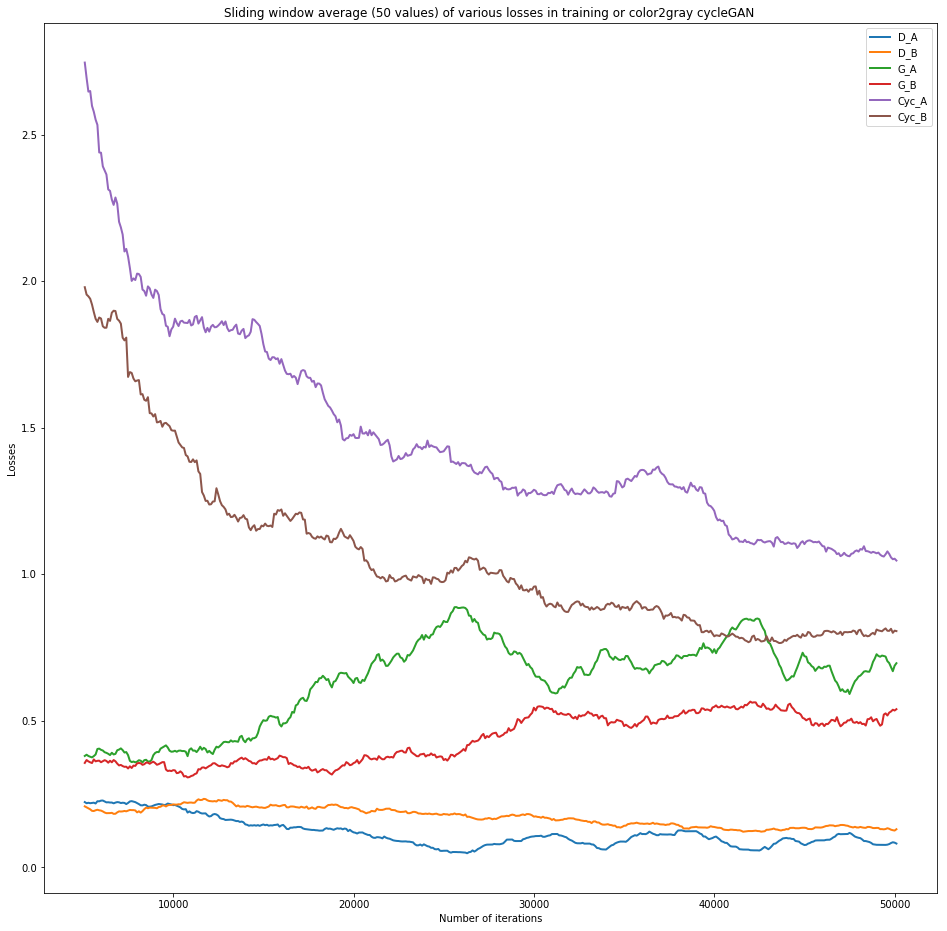

In [11]:
plt.figure(figsize=(16,16))
t = [100*(i+1) for i in range(np.shape(Cyc_A_loss)[0])]

moyenneGlissante_D_A = [np.mean(D_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_D_B = [np.mean(D_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_G_A = [np.mean(G_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_G_B = [np.mean(G_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_Cyc_A = [np.mean(Cyc_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_Cyc_B = [np.mean(Cyc_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]

totalLoss = D_A_loss + D_B_loss + 10*Cyc_A_loss + G_A_loss + G_B_loss + 10*Cyc_B_loss

moyenneGlissante_total = [np.mean(totalLoss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]

#plt.plot(t[50:], moyenneGlissante_total, linewidth=2)


plt.plot(t[50:], moyenneGlissante_D_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_D_B, linewidth=2)
plt.plot(t[50:], moyenneGlissante_G_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_G_B, linewidth=2)
plt.plot(t[50:], moyenneGlissante_Cyc_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_Cyc_B, linewidth=2)

plt.legend(['D_A', 'D_B', 'G_A', 'G_B', 'Cyc_A', 'Cyc_B'])
plt.xlabel('Number of iterations')
plt.ylabel('Losses')
plt.title('Sliding window average (50 values) of various losses in training or color2gray cycleGAN ')

### Color To Gray Unstable

This time, we unable two features that the authors added to their training procedure to lower its oscillations. The first one is to replace the negative log likelihood in the losses of the two GANs by least-sqare losses.
The second one is to update the discriminators using, not only images generated by the current version of the generator but also images from the past versions of the generators.

In [13]:
D_A_loss = np.loadtxt('./color2gray_results/color2grayUnstable/loss_log.txt', usecols=7)
G_A_loss = np.loadtxt('./color2gray_results/color2grayUnstable/loss_log.txt', usecols=9)
Cyc_A_loss = np.loadtxt('./color2gray_results/color2grayUnstable/loss_log.txt', usecols=11)
D_B_loss = np.loadtxt('./color2gray_results/color2grayUnstable/loss_log.txt', usecols=13)
G_B_loss = np.loadtxt('./color2gray_results/color2grayUnstable/loss_log.txt', usecols=15)
Cyc_B_loss = np.loadtxt('./color2gray_results/color2grayUnstable/loss_log.txt', usecols=17)

Text(0.5,1,'Sliding window average (50 values) of various losses in training or color2gray cycleGAN ')

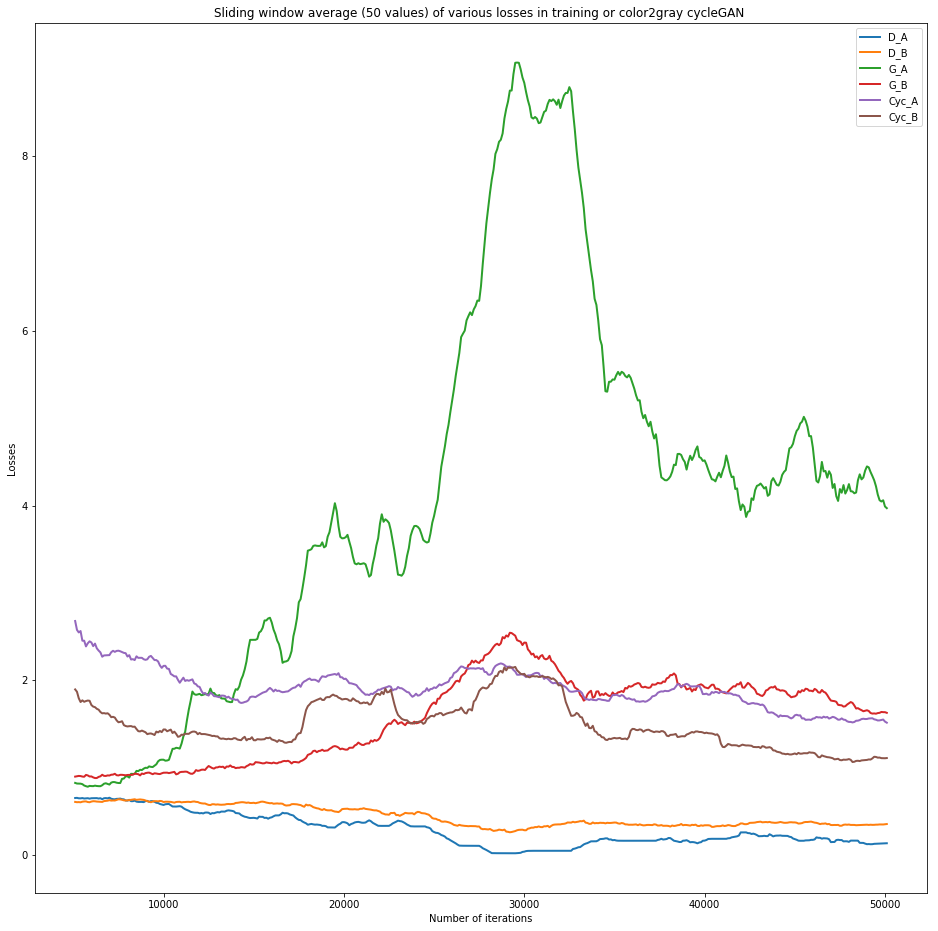

In [14]:
plt.figure(figsize=(16,16))
t = [100*(i+1) for i in range(np.shape(Cyc_A_loss)[0])]

moyenneGlissante_D_A = [np.mean(D_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_D_B = [np.mean(D_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_G_A = [np.mean(G_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_G_B = [np.mean(G_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_Cyc_A = [np.mean(Cyc_A_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
moyenneGlissante_Cyc_B = [np.mean(Cyc_B_loss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]
totalLoss = D_A_loss + D_B_loss + 10*Cyc_A_loss + G_A_loss + G_B_loss + 10*Cyc_B_loss

moyenneGlissante_total = [np.mean(totalLoss[i-50:i]) 
                    for i in range(50, np.shape(G_A_loss)[0])]

#plt.plot(t[50:], moyenneGlissante_total, linewidth=2)


plt.plot(t[50:], moyenneGlissante_D_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_D_B, linewidth=2)
plt.plot(t[50:], moyenneGlissante_G_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_G_B, linewidth=2)
plt.plot(t[50:], moyenneGlissante_Cyc_A, linewidth=2)
plt.plot(t[50:], moyenneGlissante_Cyc_B, linewidth=2)

plt.legend(['D_A', 'D_B', 'G_A', 'G_B', 'Cyc_A', 'Cyc_B'])
plt.xlabel('Number of iterations')
plt.ylabel('Losses')
plt.title('Sliding window average (50 values) of various losses in training or color2gray cycleGAN')